In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [17]:
#  Local histogram processing  3.3.3 section 
#  Use 3*3 Domain processing of 
img = cv2.imread('img.jpg')  

#  Local information picture 
H = img.shape[0]
W = img.shape[1]
hr = np.zeros(256)  

#  Original histogram information 
pr = np.zeros(256)  

#  The probability of the original image 
rtos = np.zeros(256)  

In [18]:
# r->s Mapping 
#  Calculate the pixel distribution and probability density function of the original image 
for row in range(H):
    for col in range(W):
        hr[img[row, col]] += 1
        
for i in range(256):
    pr[i] = hr[i] / (H * W)
    
for i in range(256):  
    # i=[0,255]
    for j in range(i + 1):  
        # j=[0,i]
        rtos[i] += pr[j]
    rtos[i] = round(rtos[i] * 255)  

In [19]:
#  Round to the nearest whole his
Img = np.zeros((H, W, 3), np.uint8)  

#  Set up the image after histogram equalization transformation 
for row in range(H):
    for col in range(W):
        Img[row, col] = rtos[img[row, col]]

#  Local histogram transformation , Use 3*3 Neighborhood statistical histogram of 
localsize = 3  

#  The neighborhood size is 3*3, The neighborhood value should be odd 
tempImg = np.zeros((H + localsize - 1, W + localsize - 1, 3), np.uint8)  

#  Create a boundary value for more than half of the field pixels , In order to count the edge pixels 
localHistImg = np.zeros((H, W, 3), np.uint8)  

In [20]:
#  Store new map 
for row in range(H):
    for col in range(W):
        tempImg[row + (localsize - 1) // 2, col + (localsize - 1) // 2] = img[row, col]

f = open('out.txt', 'w')
starttime = datetime.datetime.now()

In [21]:
for row in range((localsize - 1) // 2, H + (localsize - 1) // 2):
    for col in range((localsize - 1) // 2, W + (localsize - 1) // 2):  
        #  The outer circle 
        #  Each row counts whether the newly added point and the deleted point have the same gray value , here localsize yes 3, So use row,row-1,row+1 Three elements 
        #  Just compare 0 The value of the channel is OK , For grayscale images , The values of the three channels are the same 
        if row <= (localsize - 1) // 2 or col <= (localsize - 1) // 2 or row > H - 1 or col > W - 1 or tempImg[row, col - 2, 0] != tempImg[row, col + 2, 0] or tempImg[row - 1, col - 2, 0] != tempImg[row - 1, col + 2, 0] or tempImg[row + 1, col - 2, 0] != tempImg[row + 1, col + 2, 0]:
        #  Recalculate the probability distribution one column per row 
            for i in range(256):
                pr[i] = 0
                rtos[i] = 0
            for i in range(localsize):
                for j in range(localsize):
                    pr[tempImg[row + (i - (localsize - 1) // 2), col + (j - (localsize - 1) // 2)]] += 1
        
            for i in range(256):
                for j in range(i + 1):
                    rtos[i] += pr[j]
                rtos[i] = round(rtos[i] * 255 / (localsize * localsize))
            localHistImg[row - (localsize - 1) // 2, col - (localsize - 1) // 2] = rtos[tempImg[row, col]]

0:32:11.935373


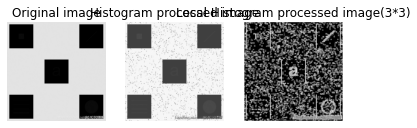

In [22]:
f.close()
endtime = datetime.datetime.now()
print(endtime - starttime)

#  Original picture 
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

#  Histogram equalization map 
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Histogram processed image')
plt.imshow(Img)

#  Histogram equalization map 
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Local Histogram processed image(3*3)')
plt.imshow(localHistImg)
plt.show()

In [24]:
summ = 0
for i in range(256):
    for j in range(i + 1):
        summ += j

print(summ)

2796160
